# Convert Time Example Function and Use 

In [1]:
#importing the required packages 
import numpy as np
import h5py as hpy
import matplotlib.pyplot as plt
import lib

In [2]:
#loading in as arrays centroid data and time data for HPF LFC Master 
cenM_ar = np.array(hpy.File('/data1/linefits/outputsLFCHPF/consolidatedData_master/All_centroidWl.hdf5', 'r')['dat'][:])
time_ar = np.array(hpy.File('/data1/linefits/outputsLFCHPF/consolidatedData_master/All_time.hdf5', 'r')['dat'][:])

In [7]:
#converting the data from the hdf5 files to datetime values using the convert_time function
cal_time = lib.convert_time(time_ar)

In [4]:
#feeding the centroid data from the hdf5 file into wl2vel to get velocity data 
cal_vel = lib.wl2vel(cenM_ar, 0)

In [9]:
#taking the median velocity from each of the velocities arrays (0 ~ 42000 for HPF LFC)
medians = [] 
for i in range(len(cal_vel)):
    med = np.nanmedian(cal_vel[i])
    medians.append(med)

#### Below is an example of why the convert_time function is essential for processing the drift of the HPF and NEID instruments.

Text(0, 0.5, 'Velocities (m/s)')

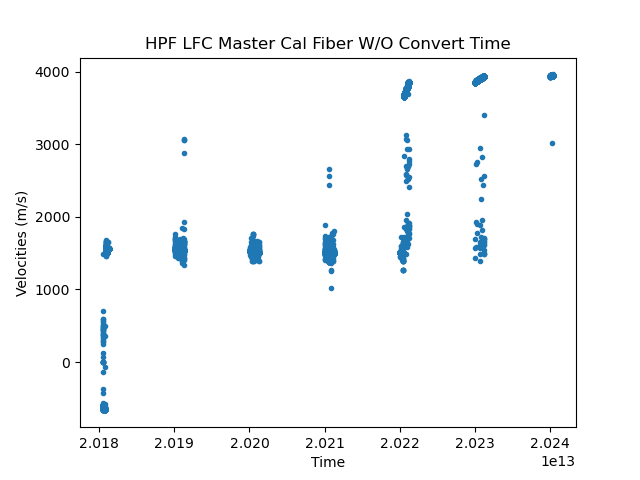

In [13]:
%matplotlib widget 
plt.figure()
plt.plot(time_ar, medians, '.')
plt.title('HPF LFC Master Cal Fiber W/O Convert Time')
plt.xlabel('Time')
plt.ylabel('Velocities (m/s)')

Text(0, 0.5, 'Velocities (m/s)')

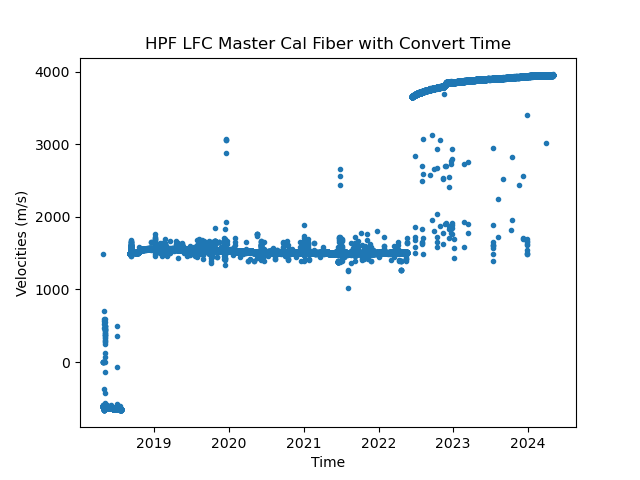

In [12]:
%matplotlib widget 
plt.figure()
plt.plot(cal_time, medians, '.')
plt.title('HPF LFC Master Cal Fiber with Convert Time')
plt.xlabel('Time')
plt.ylabel('Velocities (m/s)')